##  Random Forest Tree Classifier

In [1]:
#[-p(yes)*log(p(yes))+p(no)*log(p(no))]
import numpy as np
-((3/6)* np.log(3/6)+(3/6)*np.log(3/6))


0.6931471805599453

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
#preprocessing
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.isnull().count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
# splitting features and target

In [11]:
x = data.drop("Outcome",axis=1)

In [12]:
y = data["Outcome"]

In [13]:
# splitting the data for training and testing

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.3,random_state=60)

In [16]:
# select the model
from sklearn.ensemble import RandomForestClassifier

In [17]:
rfc =  RandomForestClassifier()

In [18]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
#predict
pred = rfc.predict(x_test)
pred

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [21]:
confusion_matrix



<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [22]:
 print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       147
           1       0.72      0.60      0.65        84

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



In [23]:
accuracy_score(y_test,pred)

0.7705627705627706

In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
help( RandomizedSearchCV)

Help on class RandomizedSearchCV in module sklearn.model_selection._search:

class RandomizedSearchCV(BaseSearchCV)
 |  RandomizedSearchCV(estimator, param_distributions, *, n_iter=10, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', random_state=None, error_score=nan, return_train_score=False)
 |  
 |  Randomized search on hyper parameters.
 |  
 |  RandomizedSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated search over parameter settings.
 |  
 |  In contrast to GridSearchCV, not all parameter values are tried out, but
 |  rather a fixed number of parameter settings is sampled from the specified
 |  distributions. The number of parameter settings that are tried is
 |  

In [26]:
# number of trees in random forest
n_estimators = [int(i) for i in np.linspace(200,2000,10)]

In [27]:
n_estimators

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [28]:
# number of features at every splitting
max_features = ["auto","sqrt"]

In [29]:
# max_depth
max_depth = [int(x) for x in np.linspace(100,500,11)]
max_depth

[100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500]

In [30]:
# param_distributions
param = {"n_estimators":n_estimators,"max_features":max_features,"max_depth":max_depth}
param

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500]}

In [31]:
#searching parameters
rfc_random = RandomizedSearchCV(estimator=rfc,param_distributions=param,n_iter=100,cv=3,verbose=3,random_state=45,n_jobs=-1)

In [32]:
rfc_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [100, 140, 180, 220, 260,
                                                      300, 340, 380, 420, 460,
                                                      500],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=45, verbose=3)

In [33]:
rfc_random.best_params_

{'n_estimators': 800, 'max_features': 'sqrt', 'max_depth': 300}

In [34]:
rfc1 = RandomForestClassifier(n_estimators=200,max_features='sqrt',max_depth=100)

In [35]:
rfc1.fit(x_train,y_train)

RandomForestClassifier(max_depth=100, max_features='sqrt', n_estimators=200)

In [36]:
rfc1_pred = rfc1.predict(x_test)
rfc1_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [38]:
accuracy_score(y_test,rfc1_pred)

0.7748917748917749

In [39]:
confusion_matrix(y_test,rfc1_pred)

array([[126,  21],
       [ 31,  53]], dtype=int64)

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
r = cross_val_score(rfc1,x,y,cv=15,scoring="roc_auc")
r

array([0.7001634 , 0.87745098, 0.84477124, 0.86195286, 0.71717172,
       0.75589226, 0.76178451, 0.92760943, 0.80892256, 0.83922559,
       0.90151515, 0.93939394, 0.85353535, 0.76384083, 0.90311419])

In [42]:
r.mean()

0.8304229336812958

## Random Forest Tree Regressor

In [43]:
data1 = pd.read_csv("Position_Salaries.csv")
data1.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [44]:
data1.shape

(10, 3)

In [45]:
data1.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [46]:
# splitting the data for features and target
data1.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

In [47]:
inpu = data1[["Position","Level"]]
inpu

,Position,Level
0,Business Analyst,1
1,Junior Consultant,2
2,Senior Consultant,3
3,Manager,4
4,Country Manager,5
5,Region Manager,6
6,Partner,7
7,Senior Partner,8
8,C-level,9
9,CEO,10


In [48]:
out = data1[["Salary"]]
out

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
label = LabelEncoder()
d = label.fit_transform(inpu["Position"])
d

array([0, 4, 8, 5, 3, 7, 6, 9, 1, 2])

In [51]:
data1[["Position"]] = d

In [52]:
inpu = data1[["Position"]]

In [53]:
x_train,x_test,y_train,y_test =  train_test_split(inpu,out,test_size=0.3,random_state=5)

In [54]:
# select the model
from sklearn.ensemble import RandomForestRegressor

In [55]:
rfr = RandomForestRegressor()

In [56]:
rfr.fit(x_train,y_train)

<ipython-input-56-3f392adc2e88>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train,y_train)


RandomForestRegressor()

In [57]:
# predict the results
y_pred = rfr.predict(x_test)
y_pred

array([360500., 174800., 257400.])

In [58]:
rfr.score(x_test,y_pred)*100

100.0

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
mean_squared_error(x_test,y_pred)


75587347505.66667

In [61]:
import math

In [62]:
math.sqrt(mean_squared_error(x_test,y_pred))

274931.53239609796

In [63]:
import matplotlib.pyplot as plt

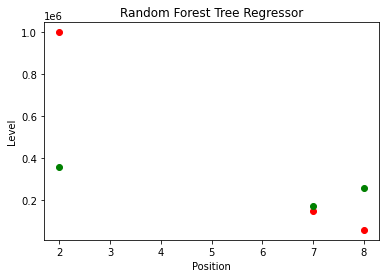

In [64]:
plt.scatter(x_test,y_test,color = "red",label = "original data")
plt.scatter(x_test,y_pred,color = "green",label = " predicted data")
plt.title("Random Forest Tree Regressor")
plt.xlabel("Position")
plt.ylabel("Level")
plt.show()